In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle

In [11]:
def get_batch(X, size):
    a = np.random.choice(len(X), size, replace=False)
    return X[a]

class Autoencoder:
    def __init__(self, input_dim, hidden_dim, epoch=1000, batch_size=50, learning_rate=0.001):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        with tf.name_scope('encode'):
            weights = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            encoded = tf.nn.sigmoid(tf.matmul(x, weights) + biases)
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            decoded = tf.matmul(encoded, weights) + biases

        self.x = x
        self.encoded = encoded
        self.decoded = decoded

        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        self.train_op = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()

    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                for j in range(np.shape(data)[0] // self.batch_size):
                    batch_data = get_batch(data, self.batch_size)
                    l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data})
                if i % 10 == 0:
                    print('epoch {0}: loss = {1}'.format(i, l))
                    self.saver.save(sess, './model.ckpt')
            self.saver.save(sess, './model.ckpt')
        
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed

In [12]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [13]:
def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

In [14]:
names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

In [15]:
data = grayscale(data)

In [16]:
x = np.matrix(data)
y = np.array(labels)
print(np.shape(x))
print(y)

(50000, 1024)
[6 9 9 ... 9 1 1]


Some examples of horse images we will feed to the autoencoder for training


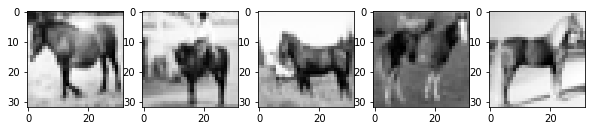

In [17]:
print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [8]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

(5000, 1024)
Instructions for updating:
Colocations handled automatically by placer.
epoch 0: loss = 124.2063217163086
epoch 10: loss = 70.36408996582031
epoch 20: loss = 54.105594635009766
epoch 30: loss = 55.80134582519531
epoch 40: loss = 58.49394226074219
epoch 50: loss = 58.578514099121094
epoch 60: loss = 54.74818420410156
epoch 70: loss = 52.21837615966797
epoch 80: loss = 54.82305145263672
epoch 90: loss = 53.202938079833984
epoch 100: loss = 51.3785285949707
epoch 110: loss = 50.968116760253906
epoch 120: loss = 51.98923873901367
epoch 130: loss = 54.9954833984375
epoch 140: loss = 49.85771942138672
epoch 150: loss = 52.427764892578125
epoch 160: loss = 53.32129669189453
epoch 170: loss = 52.80445861816406
epoch 180: loss = 48.695133209228516
epoch 190: loss = 51.28738021850586
epoch 200: loss = 51.97399139404297
epoch 210: loss = 51.49654769897461
epoch 220: loss = 48.032440185546875
epoch 230: loss = 51.00764083862305
epoch 240: loss = 49.16505432128906
epoch 250: loss = 48.